# Progetto Programmazione Data Intensive

- Utilizzo di dataset contenti risultati di partite e informazioni su vai oggetti e personaggi di un famoso videogioco
- 

In [1]:
import os
from urllib.request import urlretrieve
from zipfile import ZipFile

# constants
URL = "https://www.kaggle.com/api/v1/datasets/download/datasnaek/league-of-legends"
DATA_DIR = "data/"
ZIP_NAME = "compressed.zip"

if not os.path.exists(DATA_DIR):
    os.makedirs(DATA_DIR)

os.chdir(os.path.join(os.getcwd(), DATA_DIR))

if not os.path.exists(ZIP_NAME):
    # scarica il file dall'URL indicato
    urlretrieve(URL, ZIP_NAME)
    # apri il file zip ed estrai tutto il contenuto nella directory corrente
    with ZipFile(ZIP_NAME) as f:
        f.extractall()

In [2]:
import pandas as pd

JSON_FILENAMES = ("champion_info_2.json", "summoner_spell_info.json")
champion_info, summoner_spells = (pd.read_json(filename) for filename in JSON_FILENAMES)

In [3]:

UNCOMPRESSED_NAME = "games.csv"

games_data = pd.read_csv(UNCOMPRESSED_NAME)


# Caricamento dei dati
- `gameId`: Riferimento univoco ad una partita
- `creationTime`: Il momento in cui è stata creata la partita (in Epoch format)
- `gameDuration`: Durata del game (in secondi)
- `seasonId`: ID di sessione

-  Winner (1 = team1, 2 = team2)
  `winner`: Quale delle due squadre ha vinto la partita
- First Baron, dragon, tower, blood, inhibitor and Rift Herald (1 = team1, 2 = team2, 0 = none)
- `firstBlood`: Quale delle due squadre ha effettuato la prima uccisione ()
- `firstTower`: Quale delle due squadre ha distrutto la prima torre avversaria
- `firstInhibitor`: Quale delle due squadre ha distrutto prima un'inibitore 
- `firstBaron`: Quale delle due squadre ha ucciso il primo Barone (nemico Obbiettivo)
- `firstDragon`: Quale delle due squadre ha ucciso il primo Drago (nemico Obbiettivo)
  
- *I Prossimi parametri sono speculari per la squadra due, presentatando però
  ilprefisso 't2_'*
- `t1_champ1id`: ID del campione del giocatore 1 della prima squadra
  *Ciascun campione può sceglie tra due abilità comuni a tutti gli altri (dati presenti in summoner_spell_info.json*
  - `t1_champ1_sum1`: ID della prima summoner spell
  - `t1_champ1_sum2`: ID delle seconda summoner spell
- `t1_champ2id`: ID del campione del giocatore 2 della prima squadra
- `t1_champ3id`: ID del campione del giocatore 3 della prima squadra
- `t1_champ4id`: ID del campione del giocatore 4 della prima squadra
- `t1_champ5id`: ID del campione del giocatore 5 della prima squadra
- `t1_towerKills`: Numero di torri distrutte dalla squadra 1
- `t1_inhibitorKills`: Numero di inibitori distrutti dalla squadra 1
- `t1_baronKills`: Numero di baroni uccisi dalla squadra 1
- `t1_dragonKills`: Numero di draghi uccisi nella squadra 1
- `t1_riftHeraldKills`: Mostro che rappresenta un'obbiettivo, una volta sconfitto va ad attaccare torri nemiche
- `t1_ban1`: Eroe proibito da giocatore 1 della squadra 1, questo eroe non potra essere selezionato in questa partita
- `t1_ban2`: Eroe proibito da giocatore 2 della squadra 1
- `t1_ban3`: Eroe proibito da giocatore 3 della squadra 1
- `t1_ban4`: Eroe proibito da giocatore 4 della squadra 1
- `t1_ban5`: Eroe proibito da giocatore 5 della squadra 1 

In [4]:
games_data

,gameId,creationTime,gameDuration,seasonId,winner,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,...,t2_towerKills,t2_inhibitorKills,t2_baronKills,t2_dragonKills,t2_riftHeraldKills,t2_ban1,t2_ban2,t2_ban3,t2_ban4,t2_ban5
0,3326086514,1504279457970,1949,9,1,2,1,1,1,1,...,5,0,0,1,1,114,67,43,16,51
1,3229566029,1497848803862,1851,9,1,1,1,1,0,1,...,2,0,0,0,0,11,67,238,51,420
2,3327363504,1504360103310,1493,9,1,2,1,1,1,2,...,2,0,0,1,0,157,238,121,57,28
3,3326856598,1504348503996,1758,9,1,1,1,1,1,1,...,0,0,0,0,0,164,18,141,40,51
4,3330080762,1504554410899,2094,9,1,2,1,1,1,1,...,3,0,0,1,0,86,11,201,122,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51485,3308904636,1503076540231,1944,9,2,1,2,2,0,2,...,10,2,0,4,0,55,-1,90,238,157
51486,3215685759,1496957179355,3304,9,2,1,1,2,2,2,...,11,7,4,4,1,157,55,119,154,105
51487,3322765040,1504029863961,2156,9,2,2,2,2,0,1,...,10,2,0,2,0,113,122,53,11,157
51488,3256675373,1499562036246,1475,9,2,2,2,2,0,2,...,11,3,0,1,0,154,39,51,90,114


In [5]:
champIdColumns = ["t1_champ1id", "t1_champ2id", "t1_champ3id", "t1_champ4id", "t1_champ5id",
                 "t2_champ1id", "t2_champ2id", "t2_champ3id", "t2_champ4id", "t2_champ5id"]

In [6]:
campioni_vincenti = pd.concat([
    games_data.loc[games_data["winner"] == 1, champIdColumns[:5]],
    games_data.loc[games_data["winner"] == 2, champIdColumns[5:]]
])

# Campioni usati in partite perse
campioni_perdenti = pd.concat([
    games_data.loc[games_data["winner"] == 2, champIdColumns[:5]],
    games_data.loc[games_data["winner"] == 1, champIdColumns[5:]]
])
# Serie con numero di vittorie per ogni champ
serie_vittorie = pd.Series(campioni_vincenti.values.ravel()).value_counts()

# Serie con numero di sconfitte per ogni champ
serie_sconfitte = pd.Series(campioni_perdenti.values.ravel()).value_counts()

df_finale = pd.DataFrame({
    "partite_vinte": serie_vittorie,
    "partite_perse": serie_sconfitte
}).fillna(0).astype(int)

# Rimetti il nome dell’indice
df_finale.index.name = "champion_id"

# Se vuoi anche una colonna con l’indice:
df_finale = df_finale.reset_index()


In [7]:
df_finale

,champion_id,partite_vinte,partite_perse
0,1.0,1647,1630
1,2.0,751,818
2,3.0,1271,1446
3,4.0,1847,1743
4,5.0,1674,1571
...,...,...,...
133,429.0,1707,1865
134,432.0,1785,1948
135,497.0,3433,3408
136,498.0,3906,3937


In [8]:
df_finale["winRateChamp"] = (df_finale["partite_vinte"] / 
                (df_finale["partite_vinte"] + df_finale["partite_perse"]) * 100).round(2)
df_finale["PartiteTot"] =(df_finale["partite_vinte"] + df_finale["partite_perse"])
df_finale["UsageRate"] = ((df_finale["PartiteTot"] / len(games_data.index)) * 100).round(2)

In [9]:
df_finale.loc[df_finale["winRateChamp"] == df_finale["winRateChamp"].max() ]

,champion_id,partite_vinte,partite_perse,winRateChamp,PartiteTot,UsageRate
39,40.0,4826,3865,55.53,8691,16.88


In [10]:
df_finale.loc[df_finale["UsageRate"] == df_finale["winRateChamp"].max() ]

,champion_id,partite_vinte,partite_perse,winRateChamp,PartiteTot,UsageRate


In [11]:
df_finale.loc[df_finale["champion_id"] == 51]

,champion_id,partite_vinte,partite_perse,winRateChamp,PartiteTot,UsageRate
47,51.0,3183,3593,46.97,6776,13.16


In [12]:
df_finale

,champion_id,partite_vinte,partite_perse,winRateChamp,PartiteTot,UsageRate
0,1.0,1647,1630,50.26,3277,6.36
1,2.0,751,818,47.86,1569,3.05
2,3.0,1271,1446,46.78,2717,5.28
3,4.0,1847,1743,51.45,3590,6.97
4,5.0,1674,1571,51.59,3245,6.30
...,...,...,...,...,...,...
133,429.0,1707,1865,47.79,3572,6.94
134,432.0,1785,1948,47.82,3733,7.25
135,497.0,3433,3408,50.18,6841,13.29
136,498.0,3906,3937,49.80,7843,15.23


## Carichiamo i dati dagli altri file json

In [13]:
# Carica il file
with open("data/champion_info.json", "r", encoding="utf-8") as f:
    data = json.load(f)

# Accedi alla parte utile dei dati (data["data"] è un dizionario con campioni)
champion_data = data["data"]

# Trasforma il dizionario in DataFrame
df_champions_keyID = pd.DataFrame.from_dict(champion_data, orient="index")
# Carica il file
with open("data/champion_info_2.json", "r", encoding="utf-8") as f:
    data = json.load(f)

# Accedi alla parte utile dei dati (data["data"] è un dizionario con campioni)
champion_data = data["data"]

# Trasforma il dizionario in DataFrame
df_champions_nameID = pd.DataFrame.from_dict(champion_data, orient="index")

In [14]:
df_champions_keyID

,title,id,key,name
1,the Dark Child,1,Annie,Annie
2,the Berserker,2,Olaf,Olaf
3,the Colossus,3,Galio,Galio
4,the Card Master,4,TwistedFate,Twisted Fate
5,the Seneschal of Demacia,5,XinZhao,Xin Zhao
...,...,...,...,...
429,the Spear of Vengeance,429,Kalista,Kalista
432,the Wandering Caretaker,432,Bard,Bard
497,The Charmer,497,Rakan,Rakan
498,the Rebel,498,Xayah,Xayah


In [15]:
df_champions_nameID

,tags,title,id,key,name
None,[],None,-1,None,None
MonkeyKing,"[Fighter, Tank]",the Monkey King,62,MonkeyKing,Wukong
Jax,"[Fighter, Assassin]",Grandmaster at Arms,24,Jax,Jax
Fiddlesticks,"[Mage, Support]",the Harbinger of Doom,9,Fiddlesticks,Fiddlesticks
Shaco,[Assassin],the Demon Jester,35,Shaco,Shaco
...,...,...,...,...,...
KogMaw,"[Marksman, Mage]",the Mouth of the Abyss,96,KogMaw,Kog'Maw
Ahri,"[Mage, Assassin]",the Nine-Tailed Fox,103,Ahri,Ahri
Quinn,"[Marksman, Fighter]",Demacia's Wings,133,Quinn,Quinn
Leblanc,"[Assassin, Mage]",the Deceiver,7,Leblanc,LeBlanc


In [16]:
col = ["id", "tags"]
class_championId = df_champions_nameID.loc[df_champions_nameID["id"] != -1, col]
class_championId.columns = ["champion_id", "tags"]

In [17]:
class_championId

,champion_id,tags
MonkeyKing,62,"[Fighter, Tank]"
Jax,24,"[Fighter, Assassin]"
Fiddlesticks,9,"[Mage, Support]"
Shaco,35,[Assassin]
Warwick,19,"[Fighter, Tank]"
...,...,...
KogMaw,96,"[Marksman, Mage]"
Ahri,103,"[Mage, Assassin]"
Quinn,133,"[Marksman, Fighter]"
Leblanc,7,"[Assassin, Mage]"


In [18]:
col_df = ["champion_id", 
"winRateChamp", "UsageRate", "tags", "PartiteTot", "partite_vinte"]

class_and_games = df_finale.merge(class_championId, on="champion_id", how="left")[col_df]


In [19]:
class_and_games

,champion_id,winRateChamp,UsageRate,tags,PartiteTot,partite_vinte
0,1.0,50.26,6.36,[Mage],3277,1647
1,2.0,47.86,3.05,"[Fighter, Tank]",1569,751
2,3.0,46.78,5.28,"[Tank, Mage]",2717,1271
3,4.0,51.45,6.97,[Mage],3590,1847
4,5.0,51.59,6.30,"[Fighter, Assassin]",3245,1674
...,...,...,...,...,...,...
133,429.0,47.79,6.94,[Marksman],3572,1707
134,432.0,47.82,7.25,"[Support, Mage]",3733,1785
135,497.0,50.18,13.29,[Support],6841,3433
136,498.0,49.80,15.23,[Marksman],7843,3906


In [24]:

df_classi = class_and_games.copy()
# 1. Esplodi per singola classe
df_exploded = df_classi.explode("tags")

# 2. Calcola il totale delle partite per ciascuna classe
partite_per_classe = df_exploded.groupby("tags")["PartiteTot"].sum()

# 3. Totale complessivo
tot_partite = df_classi["PartiteTot"].sum()

# 4. Calcola UsageRate (%) per classe
usage_rate_per_class = partite_per_classe / tot_partite * 100

# 5. Calcola winRateChamp medio per classe
wins_per_class = df_exploded.groupby("tags")["partite_vinte"].sum()
winrate_per_class = wins_per_class / partite_per_classe * 100

# 6. Costruisci il DataFrame finale
df_class_summary = pd.DataFrame({
    "UsageRate": usage_rate_per_class.round(2),
    "winRateChamp": winrate_per_class.round(2)
}).sort_values("UsageRate", ascending=False)

# Mostra il risultato
print(df_class_summary)

          UsageRate  winRateChamp
tags                             
Fighter       43.90         49.77
Mage          33.35         50.21
Assassin      31.84         50.23
Marksman      24.52         49.84
Support       23.21         50.04
Tank          23.00         50.30


In [35]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm


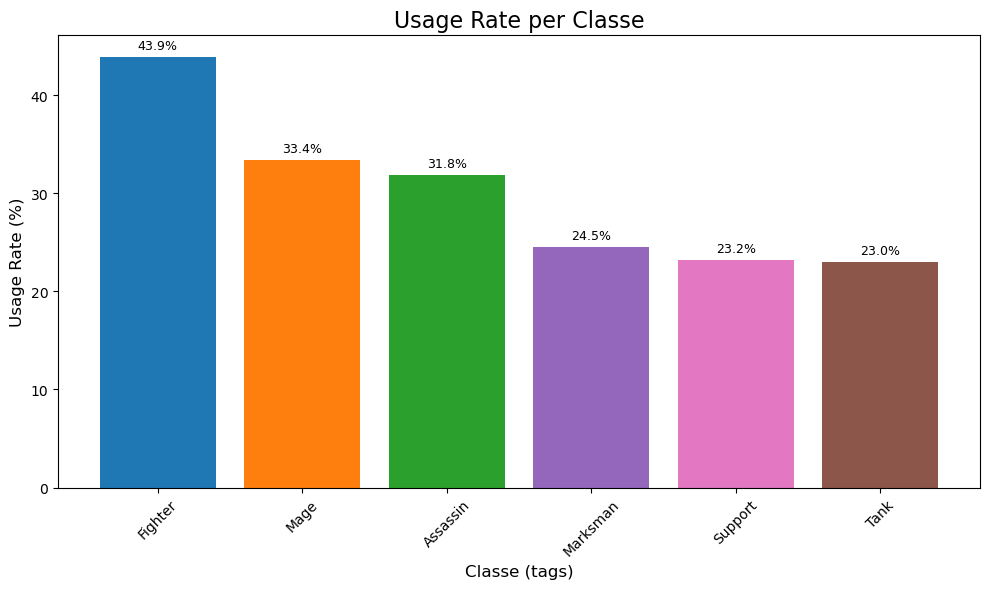

In [39]:


# Impostazioni base
plt.figure(figsize=(10, 6))


norm = mcolors.Normalize(vmin=df_class_summary["winRateChamp"].min(), vmax=df_class_summary["winRateChamp"].max())

colori = ["#1f77b4", "#ff7f0e", "#2ca02c", "#9467bd", "#e377c2", "#8c564b"]
plt.bar(df_class_summary.index, df_class_summary["UsageRate"], color=colori)
# Titolo e assi
plt.title("Usage Rate per Classe", fontsize=16)
plt.xlabel("Classe (tags)", fontsize=12)
plt.ylabel("Usage Rate (%)", fontsize=12)
plt.xticks(rotation=45)

# Etichette sopra le barre
for i, val in enumerate(df_class_summary["UsageRate"]):
    plt.text(i, val + 0.5, f"{val:.1f}%", ha='center', va='bottom', fontsize=9)

# Mostra il grafico
plt.tight_layout()
plt.show()